**Standard scores (z scores)

The standard score is the number of standard deviations by which the value of a raw score (i.e., an observed value or data point) is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores. 

Standard scores are most commonly called z-scores. Alternative terms include z-values, normal scores, and standardized variables. 

Computing a z-score requires knowing the mean and standard deviation of the complete population to which a data point belongs. (If you only have a sample of observations from the population, then the analogous computation with sample mean and sample standard deviation yields the t-statistic. )

This Jupyter notebook sets out:
 - how to work out a z score showing this visually (Method 1)
 - how to calculate a z score by working out distance from mean/ standard deviation of dataset (Method2);
 - how to calculate a z score using SciPy (Method3); and
 - comparing Methods 2 and 3


In [1]:
#Import packages
from platform import python_version
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import seaborn as sn

In [2]:
#Be clear on versions of packages
print("python version==%s" % python_version())
print("pandas==%s" % pd.__version__)
#print("matplotlib==%s" % plt.__version__)
print("scipy==%s" % scipy.__version__)
print("numpy==%s" % np.__version__)
print("seaborn==%s" % sn.__version__)

python version==3.6.5
pandas==0.23.0
scipy==1.1.0
numpy==1.14.3
seaborn==0.9.0


In [3]:
#Read in example housing dataset

data = pd.read_table("C:/Users/sonja/Desktop/TfL/Furlough Learning/AmesHousing_1.txt") 
data.shape


(2930, 82)

In [4]:
# We have lots of cols so we need to avoid truncated output
pd.options.display.max_columns = 100 # to avoid truncated output 
#View a snapshot
data.sample(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1323,1324,902406020,20,RM,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,MetalSd,MetalSd,BrkFace,164.0,TA,TA,CBlock,TA,TA,No,Rec,200.0,Unf,0.0,784.0,984.0,GasA,Gd,Y,SBrkr,984,0,0,984,1.0,0.0,1,0,2,1,Fa,5,Typ,0,NaN,Detchd,1959.0,Unf,1.0,308.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,110000
2611,2612,535403040,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1964,1964,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,312.0,LwQ,600.0,0.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1964.0,Unf,1.0,288.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000
1887,1888,534278150,20,RL,NaN,14357,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,311.0,LwQ,167.0,386.0,864.0,GasA,TA,Y,SBrkr,1187,0,0,1187,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1961.0,RFn,2.0,440.0,TA,TA,Y,128,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,CWD,Normal,140500


*Method 1: A Visual Method

In [9]:
#We are interested in understanding how the price of a random sample relates to the mean house price.
print(data['SalePrice'].sample(1))

949    215000
Name: SalePrice, dtype: int64


In [10]:
#The price of this sample is meaningless without the mean.
print(data['SalePrice'].mean())

180796.0600682594


In [11]:
#Next we need to work out whether 214k is lots of a bit higher than the mean. The 
standard_deviation_price = pd.Series(data['SalePrice']).std()
standard_deviation_price
#standard dev is nearly 80k.

79886.69235666493

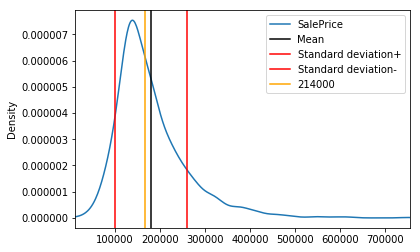

In [13]:
data['SalePrice'].plot.kde(xlim = (data['SalePrice'].min(),
                                    data['SalePrice'].max()
                                    )
                            )#create a kernel density plot showing dbn

st_dev = data['SalePrice'].std(ddof = 0) #calculate stdev
mean = data['SalePrice'].mean() # calculate mean
plt.axvline(mean, color = 'Black', label = 'Mean') #plot mean as line
plt.axvline(mean + st_dev, color = 'Red', label = 'Standard deviation+')#plot stdev
plt.axvline(mean - st_dev, color = 'Red', label = 'Standard deviation-')#plot stdev
plt.axvline(167000, color = 'Orange', label = '214000') #plot where price is
plt.legend()#print labels


Visually we can see from the chart that the price of 214k is within 1 standard deviation of the
mean. This took multiple steps. Next we do this a bit more quickly and express in terms of standard deviations away from the mean.

*Method 2: Calculating by working out distance from  mean/ standard deviation

In [14]:
# This is the distance between price & mean
distance = 214000 - data['SalePrice'].mean() 
# The next step is to work out how many st deviations away from the mean it is
st_devs_away = distance / data['SalePrice'].std(ddof = 0)
st_devs_away

#This tells me that a house of this specific price is 0.42 standard deviations away. 
#This output isn't that helpful as I want to be able to see which dataframe row the z score relates to.

0.41570888222071883

In [15]:
#So I think the best thing is to add another column. 

data['SalePrice_zscore'] = (data.SalePrice - data.SalePrice.mean())/data.SalePrice.std(ddof=0)

In [16]:
#let's check that has worked
data.sample(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePrice_zscore
2321,2322,527108090,60,RL,168.0,123257,Pave,NaN,IR3,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,Gd,No,Unf,0.0,Unf,0.0,868.0,868.0,GasA,Ex,Y,SBrkr,887,1134,0,2021,0.0,0.0,2,1,3,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,RFn,2.0,422.0,TA,TA,Y,0,100,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,274725,1.175978
2090,2091,906201022,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,7,5,1990,1991,Hip,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,738.0,Unf,0.0,172.0,910.0,GasA,Gd,Y,SBrkr,1442,0,0,1442,1.0,0.0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,1990.0,Fin,2.0,719.0,TA,TA,Y,0,244,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900,-0.011219
2726,2727,905202210,20,RL,87.0,13050,Pave,NaN,Reg,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,5,6,1963,1963,Flat,Tar&Grv,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,Gd,TA,Av,Rec,104.0,ALQ,850.0,46.0,1000.0,GasA,Ex,Y,SBrkr,1000,0,0,1000,1.0,0.0,1,0,1,1,TA,4,Typ,2,TA,Attchd,1993.0,Unf,2.0,575.0,TA,TA,Y,238,0,148,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,164000,-0.210284


In [17]:
#Let's look at the 214k row(s)
rows_I_care_about = data.query('SalePrice == 214000')
rows_I_care_about

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePrice_zscore
43,44,528138060,20,RL,70.0,10171,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,168.0,Gd,TA,PConc,Gd,TA,No,GLQ,2.0,Unf,0.0,1515.0,1517.0,GasA,Ex,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2.0,532.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,214000,0.415709
139,140,535152050,20,RL,70.0,8197,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,2003,2009,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,1188.0,Unf,0.0,292.0,1480.0,GasA,Ex,Y,SBrkr,1480,0,0,1480,1.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2003.0,RFn,2.0,620.0,TA,TA,Y,252,73,0,0,0,0,NaN,MnPrv,Shed,300,2,2010,WD,Normal,214000,0.415709
492,493,528292070,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772.0,Unf,0.0,220.0,992.0,GasA,Ex,Y,SBrkr,1022,1038,0,2060,1.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2.0,390.0,TA,TA,Y,0,0,0,168,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000,0.415709
1111,1112,528427070,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,894.0,894.0,GasA,Ex,Y,SBrkr,894,1039,0,1933,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,668.0,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000,0.415709
1472,1473,907405020,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,113.0,Gd,TA,PConc,Gd,TA,Av,GLQ,810.0,Unf,0.0,726.0,1536.0,GasA,Ex,Y,SBrkr,1536,0,0,1536,1.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2002.0,RFn,2.0,532.0,TA,TA,Y,192,74,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,214000,0.415709
1834,1835,533205110,120,FV,45.0,4379,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,851.0,Unf,0.0,527.0,1378.0,GasA,Ex,Y,SBrkr,1378,0,0,1378,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2004.0,Fin,2.0,540.0,TA,TA,Y,160,56,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,214000,0.415709
2518,2519,533253030,120,RL,NaN,3760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Greens,Norm,Norm,Twnhs,1Story,8,5,1980,1980,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1009.0,LwQ,182.0,44.0,1235.0,GasA,Gd,Y,SBrkr,1235,0,0,1235,1.0,0.0,1,0,1,1,TA,4,Typ,3,TA,Attchd,1980.0,Fin,2.0,484.0,TA,TA,Y,133,78,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,214000,0.415709
2775,2776,907180120,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162.0,Unf,0.0,426.0,1588.0,GasA,Ex,Y,SBrkr,1588,0,0,1588,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2.0,472.0,TA,TA,Y,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,0.415709
2791,2792,907254050,60,RL,45.0,9468,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,N

*Method 3: Let's use the SciPy library to do the zscore calculation

In [18]:
#The function to use is pretty easy to find.
#Using the z score SciPy function on the SalesPrice series gives me an array showing the number of standard deviations
#each data point is above or below the mean. This is not that useful
z = stats.zscore(data['SalePrice'])
z

array([ 0.42822875, -0.94895652, -0.11012549, ..., -0.61092014,
       -0.13516523,  0.09019236])

In [19]:
#So I have created another column
data['SalePrice_zscore_SciPy'] = stats.zscore(data['SalePrice'])


In [20]:
#Let's see whether this has worked
data.sample(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePrice_zscore,SalePrice_zscore_SciPy
2784,2785,907202140,20,RL,69.0,9920,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1969,1969,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,523.0,Unf,0.0,448.0,971.0,GasA,TA,Y,SBrkr,971,0,0,971,0.0,0.0,1,1,3,1,TA,5,Typ,1,Po,Attchd,1969.0,Unf,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,128500,-0.654740,-0.654740
754,755,903451090,70,RM,57.0,6876,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,6,5,1927,1950,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,Fa,No,BLQ,522.0,Unf,0.0,198.0,720.0,GasA,Fa,Y,SBrkr,1146,784,0,1930,1.0,0.0,2,0,4,1,TA,8,Typ,0,NaN,Attchd,1927.0,Unf,1.0,316.0,TA,TA,Y,0,0,213,0,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,149000,-0.398082,-0.398082
1312,1313,902304060,190,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,5,1920,1960,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,234.0,Unf,0.0,739.0,973.0,GasA,TA,Y,FuseP,1377,973,0,2350,0.0,0.0,2,0,4,2,TA,10 or more,Typ,0,NaN,2Types,1930.0,Unf,2.0,393.0,TA,TA,Y,0,0,219,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,130000,-0.635960,-0.635960


I have two new columns - SalePrice_zscore and SalePrice_zscore_SciPy and they are identical.
Passing df.std(ddof=0) produces the same result as scipy.stats.zscore - zero degress of freedom is the default.
I have, for these purposes, treated this dataset like a population rather than as a sample. When working with a sample the standard deviation would be dividing by n-1 (rather than n) due to the Bessel correction. See Variability Jupyter Notebook for more detail.

In [ ]:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html